In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"]="0"

!nvidia-smi

Sat Jun  8 22:39:04 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4090        Off |   00000000:19:00.0 Off |                  Off |
|  0%   48C    P8             36W /  450W |      11MiB /  24564MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
import torch
from diffusers import StableDiffusionPipeline, DDPMScheduler

pipe = StableDiffusionPipeline.from_single_file("/data/sd_files/checkpoint/beautifulRealistic_v7.safetensors",
                                                torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")
pipe.scheduler = DDPMScheduler.from_config(pipe.scheduler.config)

print('done')

/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-06-08 22:39:06.804668: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-08 22:39:07.615823: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
pytorch_model.bin: 100%|███████████████████| 1.22G/1.22G [03:10<00:00, 6.39MB/s]
/home/scpark/anaconda3/envs/ste/lib/python3.9/site-packages/torch/_utils.py:776: UserWarning: TypedStorage is deprecated. It will be removed in the future and UntypedStorage will be the only storage class. This

done


100%|███████████████████████████████████████████| 20/20 [00:01<00:00, 15.05it/s]


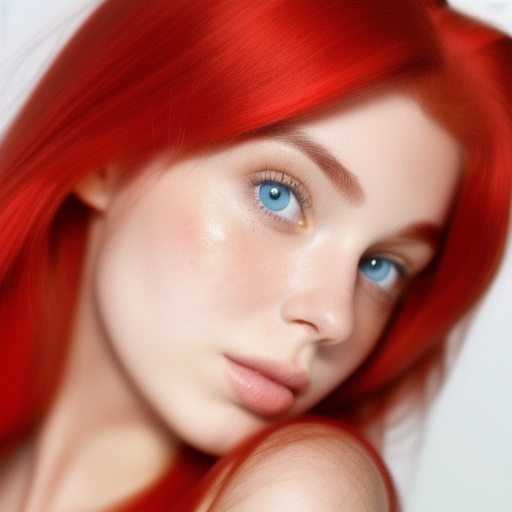

In [5]:
prompt = "a pretty girl's face with red hair"

image = pipe(prompt=prompt,
         height=512,
         width=512,
         num_inference_steps=20,
         guidance_scale=7,
        ).images[0]
image


In [6]:
pipe.unet.config

FrozenDict([('sample_size', 64),
            ('in_channels', 4),
            ('out_channels', 4),
            ('center_input_sample', False),
            ('flip_sin_to_cos', True),
            ('freq_shift', 0),
            ('down_block_types',
             ('CrossAttnDownBlock2D',
              'CrossAttnDownBlock2D',
              'CrossAttnDownBlock2D',
              'DownBlock2D')),
            ('mid_block_type', 'UNetMidBlock2DCrossAttn'),
            ('up_block_types',
             ('UpBlock2D',
              'CrossAttnUpBlock2D',
              'CrossAttnUpBlock2D',
              'CrossAttnUpBlock2D')),
            ('only_cross_attention', False),
            ('block_out_channels', (320, 640, 1280, 1280)),
            ('layers_per_block', 2),
            ('downsample_padding', 1),
            ('mid_block_scale_factor', 1),
            ('dropout', 0.0),
            ('act_fn', 'silu'),
            ('norm_num_groups', 32),
            ('norm_eps', 1e-05),
            ('cross_attenti